In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ppr.robot import Robot_3R
from ppr.path import TrajectoryPt, TolerancedNumber
from ppr.geometry import Rectangle

In [70]:
# ROBOT
robot1 = Robot_3R([2, 2.5, 0.5])

# PATH
dx    = TolerancedNumber(2.9, 2.8, 3.0, samples=3)
dy    = np.linspace(-2, 2, 20)
angle = TolerancedNumber(0.0, 0, 2 * np.pi, samples=50)
path1 = [TrajectoryPt([dx, yi, angle]) for yi in dy]

# COLLISION SCENE
sc1 = [Rectangle(1, -0.5, 1.5, 0.3, 0),
       Rectangle(0.7, 1, 1.2, 0.3, 0),
       Rectangle(3, -2.5, 0.5, 5, 0)]

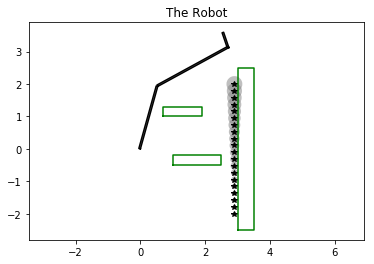

In [71]:
fig1, ax1 = plt.subplots()
plt.title("The Robot")
ax1.axis('equal')
robot1.plot(ax1, [1.3, -0.8, 1.4], 'k')
for tp in path1: tp.plot(ax1)
for r in sc1: r.plot(ax1, 'g')
plt.show()

In [72]:
from ppr.sampling import cart_to_joint
#from ppr.sampling import get_shortest_path
#from ppr.graph_pure_python import get_shortest_path
#from ppr.graph_pure_python import get_shortest_path2
from ppr.graph_pure_python import get_shortest_path3

In [73]:
path_js = cart_to_joint(robot1, path1, check_collision=True, scene=sc1)
print([len(qp) for qp in path_js])

[59, 59, 59, 59, 59, 57, 40, 28, 19, 14, 8, 1, 10, 16, 22, 31, 44, 59, 71, 78]


In [74]:
sol = get_shortest_path3(path_js)
print(sol)
print(len(sol['paths']))

{'success': True, 'paths': [[array([-1.58258476,  1.48422715,  0.6112707 ]), array([-1.57036575,  1.53494669,  0.67656042]), array([-1.54985243,  1.57896564,  0.74025643]), array([-1.52096224,  1.61637907,  0.80218107]), array([-1.48361306,  1.64711569,  0.86232355]), array([-1.43776222,  1.6709717 ,  0.92084496]), array([-1.38344267,  1.68764272,  0.97808266]), array([-1.32079408,  1.69675534,  1.03454973]), array([-1.25008439,  1.69789821,  1.09092545]), array([-1.17171723,  1.69065069,  1.14803407]), array([-1.12793627,  1.73437334,  1.18875873])], [array([ 1.22055404, -1.66066525,  5.05632898]), array([ 1.29203207, -1.65889985,  5.11131383]), array([ 1.35556082, -1.64912703,  5.16624053]), array([ 1.41087244, -1.63177525,  5.2218054 ]), array([ 1.45782487, -1.60724018,  5.27854618]), array([ 1.49638045, -1.57585304,  5.33683172]), array([ 1.52657494, -1.53784785,  5.39686032]), array([ 1.54848113, -1.49332801,  5.45866256]), array([ 1.61208286, -1.49148692,  5.52144801])]], 'split_

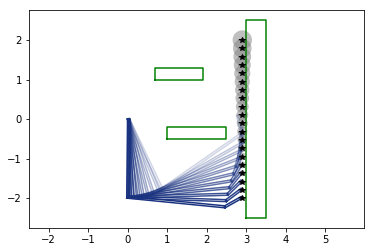

In [75]:
fig2, ax2 = plt.subplots()
ax2.axis('equal')
robot1.plot_path(ax2, sol['paths'][0])
for r in sc1: r.plot(ax2, 'g')
for tp in path1: tp.plot(ax2)
plt.show()

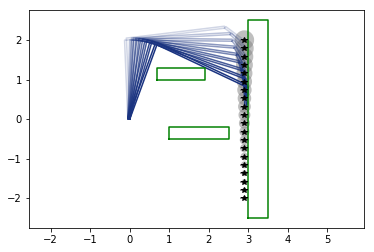

In [76]:
fig2, ax2 = plt.subplots()
ax2.axis('equal')
robot1.plot_path(ax2, sol['paths'][1])
for r in sc1: r.plot(ax2, 'g')
for tp in path1: tp.plot(ax2)
plt.show()